In [1]:
%matplotlib inline
from pylab import *
from neurotools.nlab import *
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as patches

Loading nlab namespace
<function decorator at 0x7f6a08773510>


In [2]:
matplotlib.rcParams['figure.dpi']=150
print('Workspace prepared')

Workspace prepared


In [3]:
colors = array([VIOLET,MAUVE,RUST,OCHRE,MOSS,TURQUOISE,AZURE,VIOLET])
ncolor = len(colors)
riley  = matplotlib.colors.LinearSegmentedColormap.from_list('riley',colors)

In [4]:
# Paper units
A4sizecm  = array([29.7,21])
A3sizecm  = array([42.0,29.7])
cmperinch = 2.54

# 17-pin solution, rectangular grid

To keep costs down, we assume that we're using an inexpensive Arduinio Due/Uno compatible clone. The Atmega168 actually has 22 GPIO pins, but the Arduino uses 2 for the crystal oscillator, leaving 20 GPIO pins. We keep the serial pins 0 and 1 free in case we want to use them to pipe data to/from the display, leaving 18 GPIO pins. We need an odd number, so use 17. 

Using 17 control lines
Marquee dimension is 6.86 x 36.00 cm
Marquee height           is    8 pixels
Marquee width            is   34 pixels
Pixel horizontal spacing is 1.03 cm
Pixel vertical   spacing is 0.73 cm
Pixel aspect ratio       is 1.41
Pixel width              is 0.83 cm
Pixel height             is 0.53 cm
Bbox(x0=0.07142857142857142, y0=0.6681096681096681, x1=0.9285714285714285, y1=0.898989898989899)
Bbox(x0=0.07142857142857142, y0=0.20202020202020202, x1=0.9285714285714285, y1=0.4329004329004329)


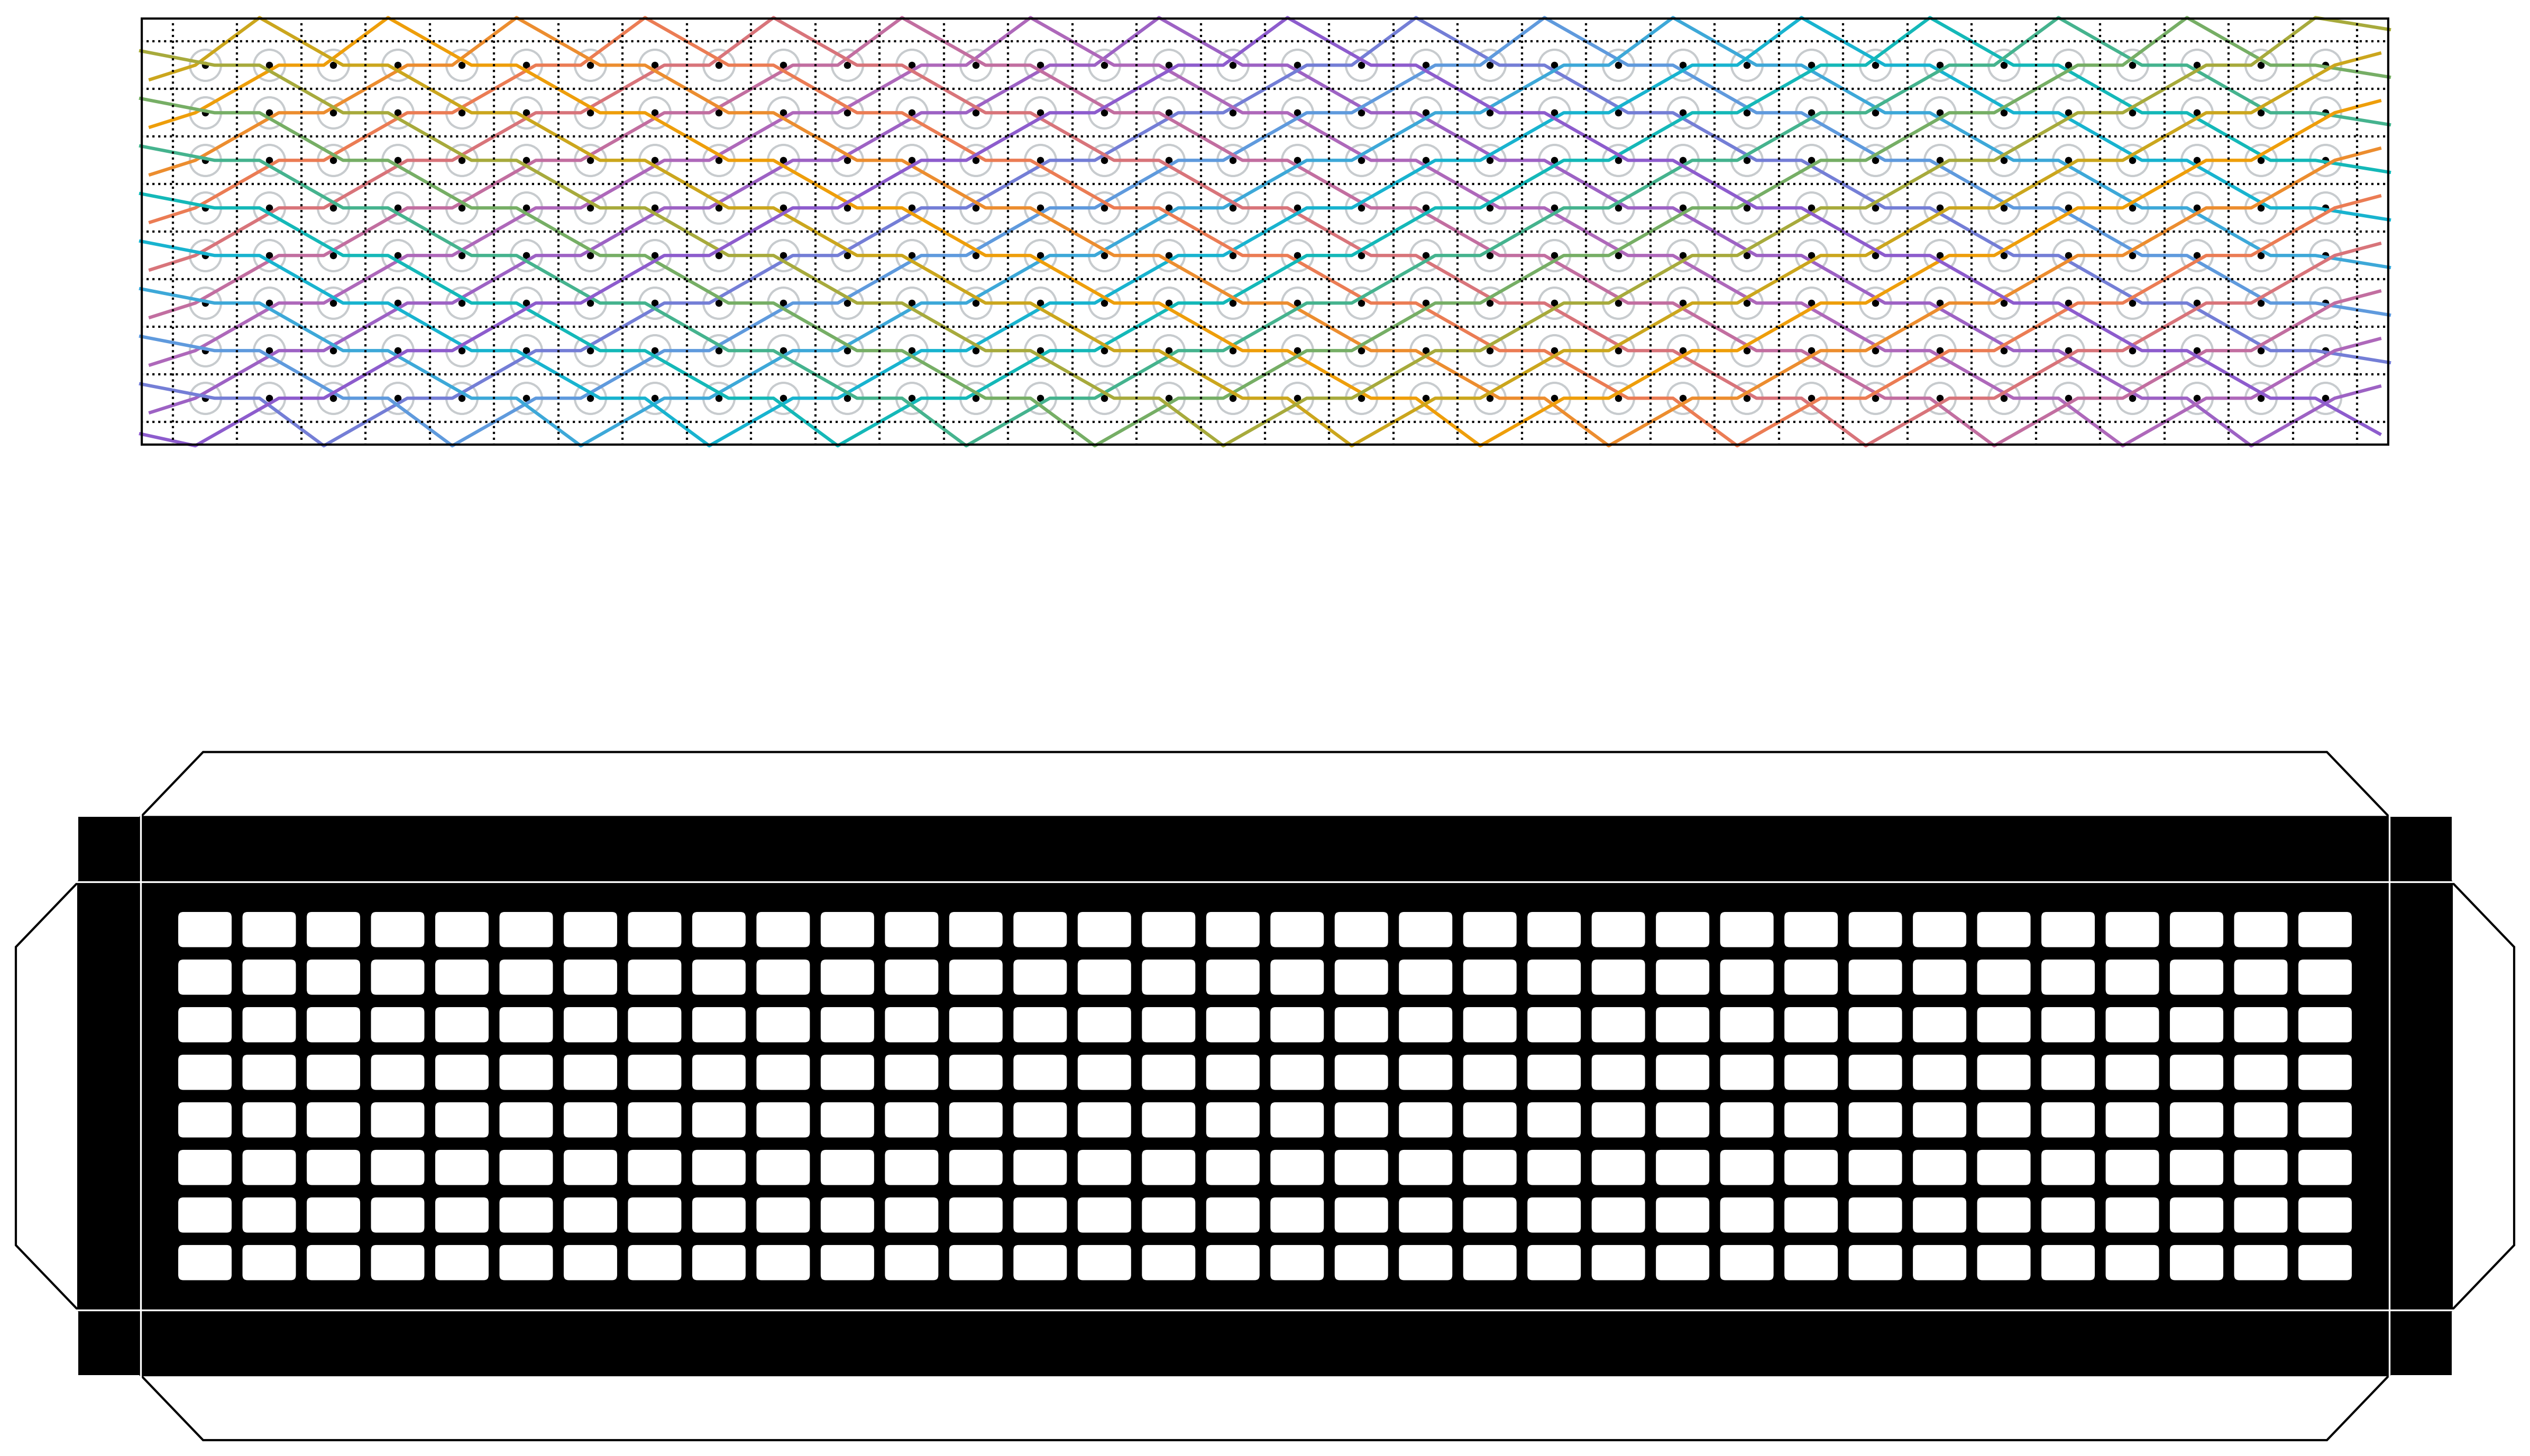

In [5]:
# Paper units
figsizecm = A3sizecm
figsizein = figsizecm/cmperinch
paperlengthcm,paperheightcm = A3sizecm

N  = 17 # should be odd
H  = N//2
M  = N*(N-1)
W  = M//H

marqueelengthcm = A3sizecm[0]-6
marqueeaspect   = 5.25
marqueeheightcm = marqueelengthcm/marqueeaspect
cellpaddingmm   = 2
marqueepadpx    = 1

dx = (marqueelengthcm-marqueepadpx)/W
dy = (marqueeheightcm-marqueepadpx)/H

# 457 × 88 mm was the resulting paper size?

print("Using %d control lines"%N)
print('Marquee dimension is %0.2f x %0.2f cm'%(marqueeheightcm,marqueelengthcm))
print("Marquee height           is %4d pixels"%H)
print("Marquee width            is %4d pixels"%W)
print('Pixel horizontal spacing is %.2f cm'%dx)
print('Pixel vertical   spacing is %.2f cm'%dy)
print('Pixel aspect ratio       is %.2f'%(dx/dy))
print('Pixel width              is %.2f cm'%(dx-0.1*cellpaddingmm))
print('Pixel height             is %.2f cm'%(dy-0.1*cellpaddingmm))


size = 200
lw = 1.5

EDGECOLOR = 1-(1-BLACK)*0.9
VCOLOR    = BLACK
HCOLOR    = BLACK
LEDCOLOR  = 1-(1-BLACK)*0.2
EDGECOLOR = 1-(1-BLACK)*0.3

mx,my=0,0
figure(figsize=figsizein,dpi=300)

# Manually "fix" axis size
ax1 = subplot(211)
padleftrightcm = (paperlengthcm-marqueelengthcm)/2
padtopcm       = paperheightcm - marqueeheightcm - 3
pattopfraction = padtopcm / paperheightcm
padLRfraction  = padleftrightcm / paperlengthcm
widthfraction  = marqueelengthcm/paperlengthcm
heightfraction = marqueeheightcm/paperheightcm
ax1.set_position((padLRfraction,pattopfraction,widthfraction,heightfraction))
print(ax1.get_position())

# Draw dots at LED locations
for i in range(W):
    for j in range(H):
        scatter(i*dx,j*dy,s=size,facecolor=(1,1,1,0),edgecolor=EDGECOLOR,clip_on=False)
        scatter(i*dx,j*dy,s=5,color='k',clip_on=False)

# Draw traces/routing
def paint_path(y0,d0=1,i=0,color=BLACK):
    px,py = [],[]
    x = -1
    y = y0
    direction = d0
    py = [y+(direction)*-.3] if y>=0 else [-0.75]
    while x<=W:
        px += [x+(0.15*(-1 if i%2 else 1))]
        py += [y-d0*0.25+0.5] if x>=W-1 else [y]
        i += 1
        if y==H:
            direction = -1
            y += direction
            i += 1
        elif y==-1:
            direction = 1
            y += direction
            i += 1
        elif (i%2):
            y += direction
        x += 1
    px,py = array(px),array(py)
    px = maximum(-1,px)
    px = minimum(W,px)
    plot(px*dx,py[:-1]*dy,color=color,zorder=1,clip_on=False)

for i in range(H):
    paint_path(i,1,0,color=riley((i+1)/N))
    paint_path(i,-1,1,color=riley((N-0.5)/N-(i+0.75)/N))
if (N%2):
    paint_path(-1,1,1,color=riley(0))
for i in range(W+1):
    axvline((i-0.5)*dx,color='k',lw=1,linestyle=':')
for i in range(H+1):
    axhline((i-0.5)*dy,color='k',lw=1,linestyle=':')
px02 = (-.5-marqueepadpx/2)*dx
py02 = (-.5-marqueepadpx/2)*dy
axvline(px02,color='k',lw=2)
axhline(py02,color='k',lw=2)
axvline(W*dx,color='k',lw=2)
axhline(H*dy,color='k',lw=2)
xlim(px02,W*dx)
ylim(py02,H*dy)
noxyaxes()


# Manually "fix" axis size
ax2 = subplot(212,facecolor='k')
padleftrightcm = (paperlengthcm-marqueelengthcm)/2
padtopcm       = 6
pattopfraction = padtopcm / paperheightcm
padLRfraction  = padleftrightcm / paperlengthcm
widthfraction  = marqueelengthcm/paperlengthcm
heightfraction = marqueeheightcm/paperheightcm
ax2.set_position((padLRfraction,pattopfraction,widthfraction,heightfraction))
print(ax2.get_position())


for i in range(W+1):
    axvline((i-0.5)*dx,color='k',lw=6)
for i in range(H+1):
    axhline((i-0.5)*dy,color='k',lw=6)
px02 = (-.5-marqueepadpx/2)*dx
py02 = (-.5-marqueepadpx/2)*dy
axvline(px02,color='k',lw=2)
axhline(py02,color='k',lw=2)
axvline(W*dx,color='k',lw=2)
axhline(H*dy,color='k',lw=2)
for i in range(W):
    for j in range(H):
        px = (i-0.5)*dx+0.1*cellpaddingmm/2
        py = (j-0.5)*dy+0.1*cellpaddingmm/2*(dx/dy)
        pdx = dx-0.1*cellpaddingmm
        pdy = dy-0.1*cellpaddingmm*(dx/dy)
        pad = 0.1
        rescale = 1/(1+pad*2)
        fixx = pdx*(1-rescale)/2
        fixy = pdy*(1-rescale)/2
        p_bbox = FancyBboxPatch((px+fixx,py+fixy),pdx*rescale,pdy*rescale,
                                boxstyle="round,pad=%f"%pad,
                                ec="k", fc='w',
                                zorder = 10)
        gca().add_patch(p_bbox)

# Tabs
def draw_tab_y(y1,dy=1):
    px = [px02,W*dx,W*dx,px02]
    py = [y1,y1,y1+dy,y1+dy]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='k', 
                                  clip_on=False))
    px = [px02,W*dx,W*dx-1,px02+1]
    py = [y1+dy,y1+dy,y1+2*dy,y1+2*dy]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='w',
                                  edgecolor='k',
                                  clip_on=False))
draw_tab_y(H*dy)
draw_tab_y(py02,-1)

def draw_tab_x(x1,dx=1):
    py = [py02-1,H*dy+1,H*dy+1,py02-1]
    px = [x1,x1,x1+dx,x1+dx]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='k', 
                                  clip_on=False))
    py = [py02,H*dy,H*dy-1,py02+1]
    px = [x1+dx,x1+dx,x1+2*dx,x1+2*dx]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='w',
                                  edgecolor='k',
                                  clip_on=False))
draw_tab_x(W*dx)
draw_tab_x(px02,-1)
for y1 in [H*dy,py02]:
    plot([px02-2,W*dx+2],[y1,y1],color='w',clip_on=False,lw=0.8)
for x1 in [W*dx,px02]:
    plot([x1,x1],[py02-2,H*dy+2],color='w',clip_on=False,lw=0.8)

xlim(px02,W*dx)
ylim(py02,H*dy)
noxyaxes()

#savefigure('Marquee_%s_combined'%N)
savefig('Marquee_%s_combined.pdf'%N,facecolor='w',edgecolor='k',papertype='a3')

# Tiny Marquee

Using 11 control lines
Marquee dimension is 4.51 x 23.70 cm
Marquee height           is    5 pixels
Marquee width            is   22 pixels
Pixel horizontal spacing is 1.03 cm
Pixel vertical   spacing is 0.70 cm
Pixel aspect ratio       is 1.47
Pixel width              is 0.83 cm
Pixel height             is 0.50 cm
Bbox(x0=0.10101010101010101, y0=0.6421768707482994, x1=0.898989898989899, y1=0.8571428571428572)
Bbox(x0=0.10101010101010101, y0=0.2857142857142857, x1=0.898989898989899, y1=0.5006802721088435)


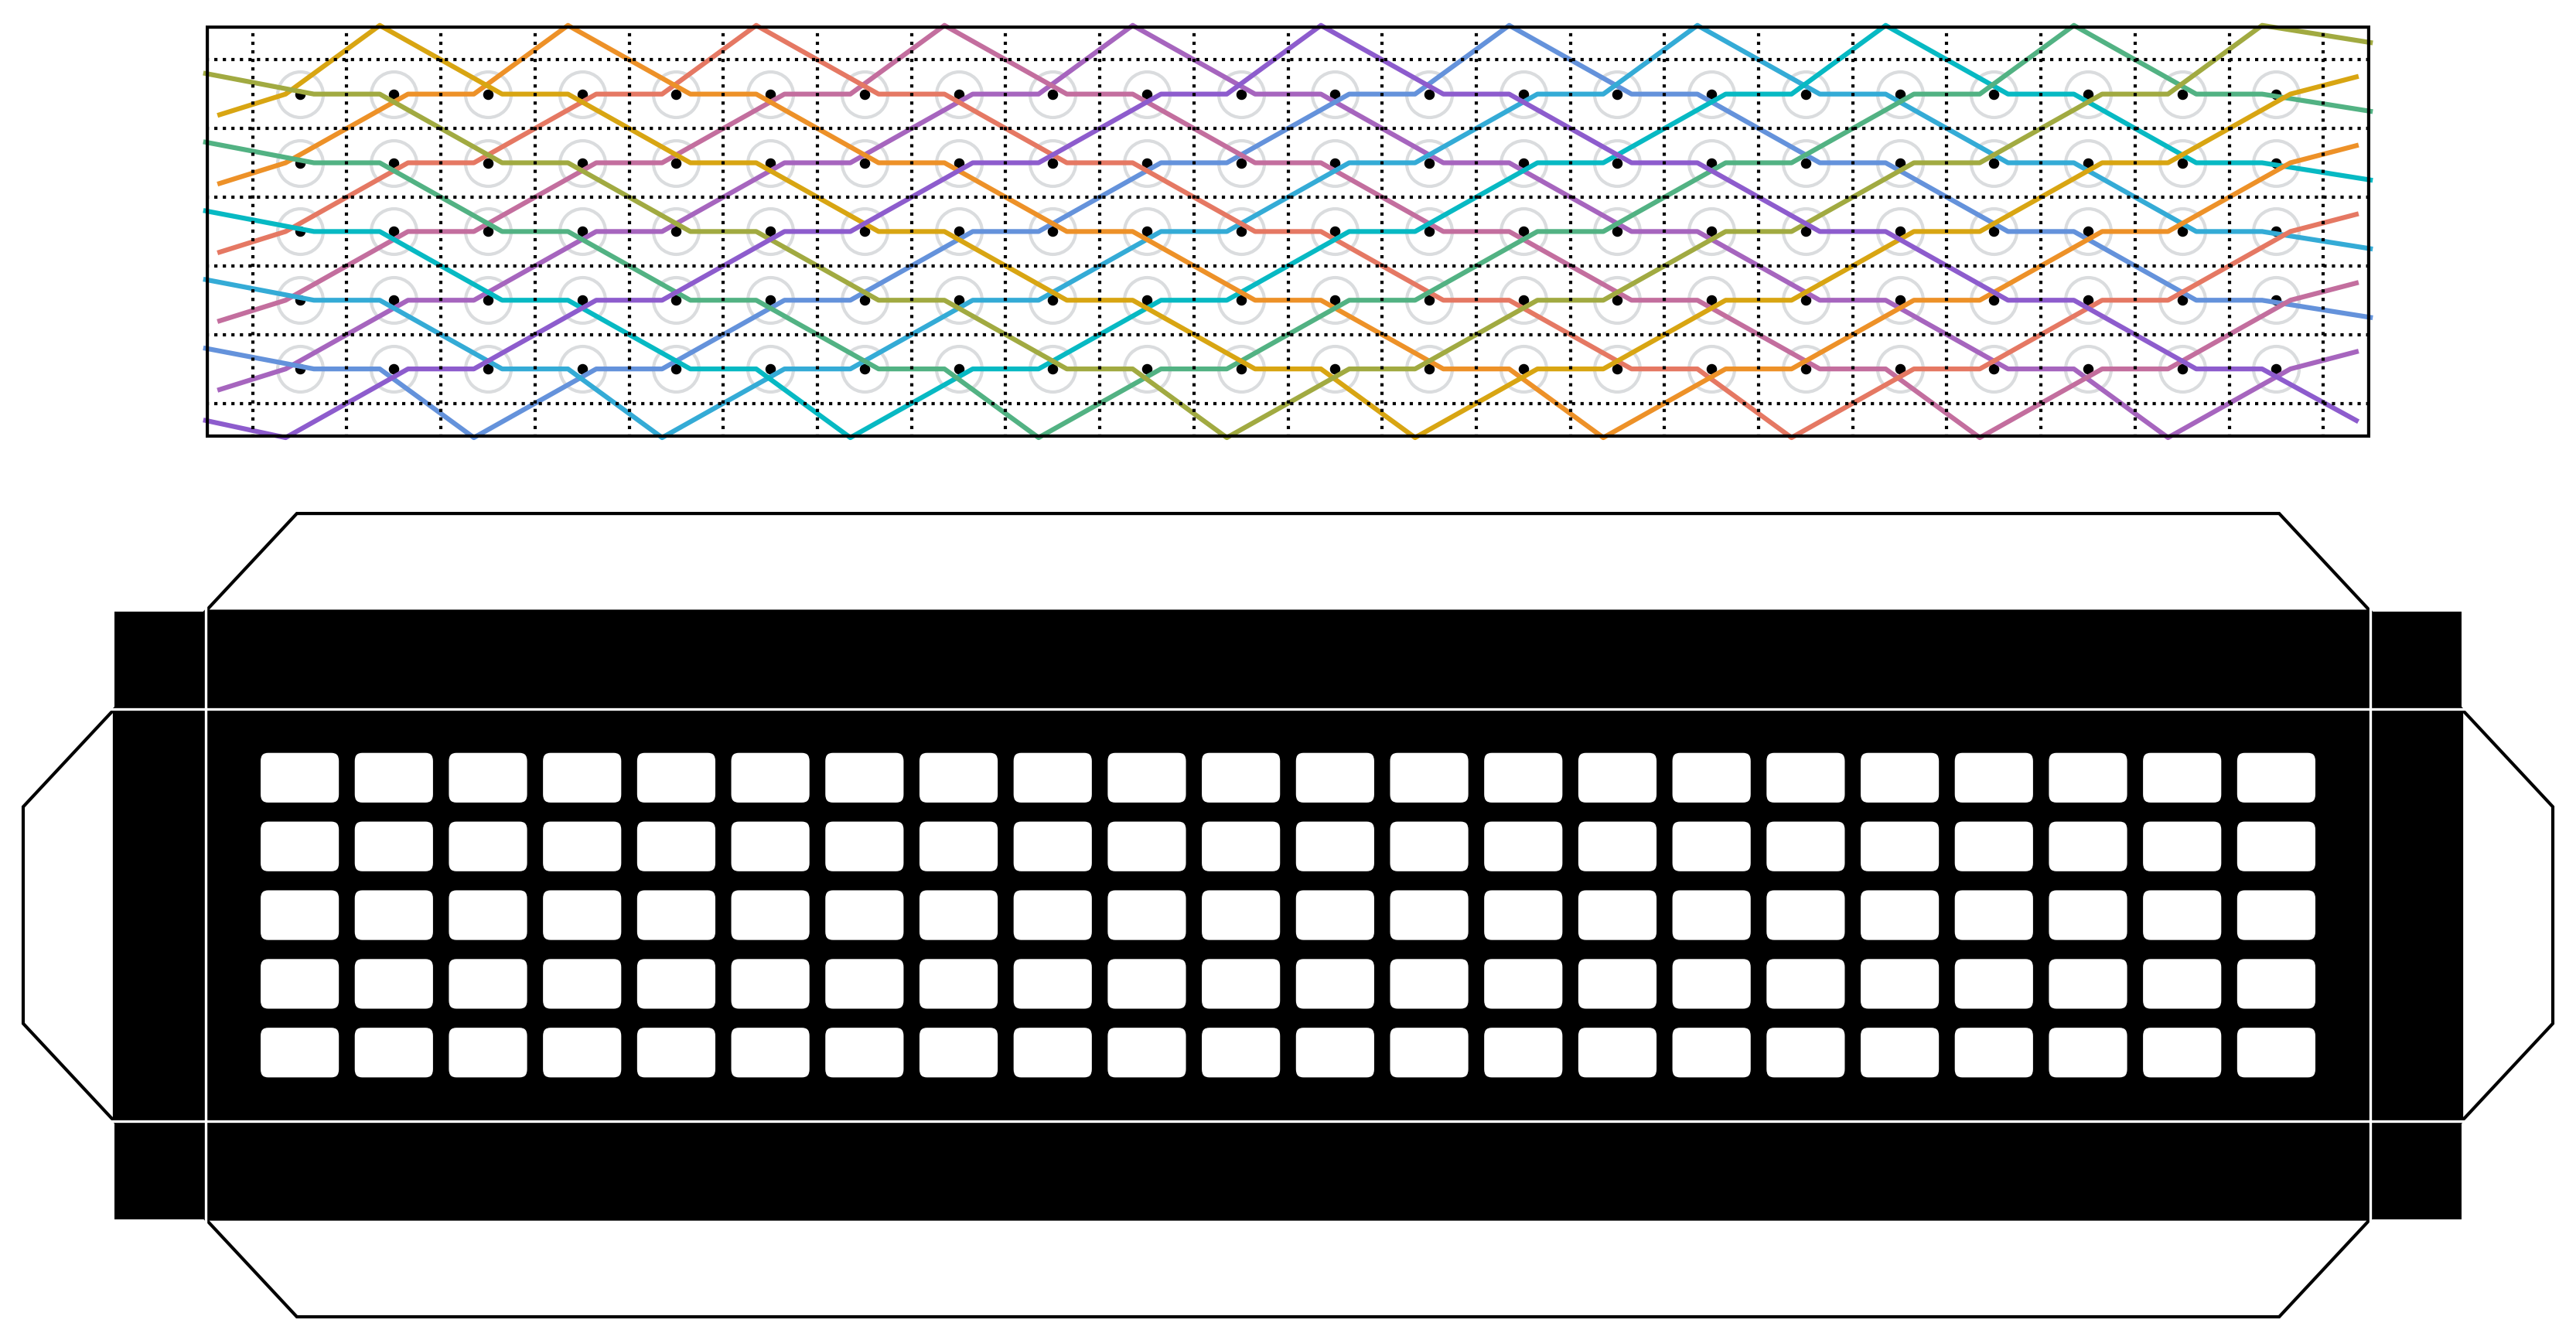

In [284]:
figsizecm = A4sizecm
figsizein = figsizecm/cmperinch
paperlengthcm,paperheightcm = A4sizecm

N  = 11 # should be odd
H  = N//2
M  = N*(N-1)
W  = M//H

marqueelengthcm = A4sizecm[0]-6
marqueeaspect   = 5.25
marqueeheightcm = marqueelengthcm/marqueeaspect
cellpaddingmm   = 2
marqueepadpx    = 1

dx = (marqueelengthcm-marqueepadpx)/W
dy = (marqueeheightcm-marqueepadpx)/H

print("Using %d control lines"%N)
print('Marquee dimension is %0.2f x %0.2f cm'%(marqueeheightcm,marqueelengthcm))
print("Marquee height           is %4d pixels"%H)
print("Marquee width            is %4d pixels"%W)
print('Pixel horizontal spacing is %.2f cm'%dx)
print('Pixel vertical   spacing is %.2f cm'%dy)
print('Pixel aspect ratio       is %.2f'%(dx/dy))
print('Pixel width              is %.2f cm'%(dx-0.1*cellpaddingmm))
print('Pixel height             is %.2f cm'%(dy-0.1*cellpaddingmm))

size = 200
lw = 1.5
EDGECOLOR = 1-(1-BLACK)*0.9
VCOLOR    = BLACK
HCOLOR    = BLACK
LEDCOLOR  = 1-(1-BLACK)*0.1
EDGECOLOR = 1-(1-BLACK)*0.2

mx,my=0,0
figure(figsize=figsizein,dpi=300)

# Manually "fix" axis size
ax1 = subplot(211)
padleftrightcm = (paperlengthcm-marqueelengthcm)/2
padtopcm       = paperheightcm - marqueeheightcm - 3
pattopfraction = padtopcm / paperheightcm
padLRfraction  = padleftrightcm / paperlengthcm
widthfraction  = marqueelengthcm/paperlengthcm
heightfraction = marqueeheightcm/paperheightcm
ax1.set_position((padLRfraction,pattopfraction,widthfraction,heightfraction))
print(ax1.get_position())

# Draw dots at LED locations
for i in range(W):
    for j in range(H):
        scatter(i*dx,j*dy,s=size,facecolor=(1,1,1,0),edgecolor=EDGECOLOR,clip_on=False)
        scatter(i*dx,j*dy,s=5,color='k',clip_on=False)

# Draw traces/routing
def paint_path(y0,d0=1,i=0,color=BLACK):
    px,py = [],[]
    x = -1
    y = y0
    direction = d0
    py = [y+(direction)*-.3] if y>=0 else [-0.75]
    while x<=W:
        px += [x+(0.15*(-1 if i%2 else 1))]
        py += [y-d0*0.25+0.5] if x>=W-1 else [y]
        i += 1
        if y==H:
            direction = -1
            y += direction
            i += 1
        elif y==-1:
            direction = 1
            y += direction
            i += 1
        elif (i%2):
            y += direction
        x += 1
    px,py = array(px),array(py)
    px = maximum(-1,px)
    px = minimum(W,px)
    plot(px*dx,py[:-1]*dy,color=color,zorder=1,clip_on=False)

for i in range(H):
    paint_path(i,1,0,color=riley((i+1)/N))
    paint_path(i,-1,1,color=riley((N-0.5)/N-(i+0.75)/N))
if (N%2):
    paint_path(-1,1,1,color=riley(0))
for i in range(W+1):
    axvline((i-0.5)*dx,color='k',lw=1,linestyle=':')
for i in range(H+1):
    axhline((i-0.5)*dy,color='k',lw=1,linestyle=':')
px02 = (-.5-marqueepadpx/2)*dx
py02 = (-.5-marqueepadpx/2)*dy
axvline(px02,color='k',lw=2)
axhline(py02,color='k',lw=2)
axvline(W*dx,color='k',lw=2)
axhline(H*dy,color='k',lw=2)
xlim(px02,W*dx)
ylim(py02,H*dy)
noxyaxes()


# Manually "fix" axis size
ax2 = subplot(212,facecolor='k')
padleftrightcm = (paperlengthcm-marqueelengthcm)/2
padtopcm       = 6
pattopfraction = padtopcm / paperheightcm
padLRfraction  = padleftrightcm / paperlengthcm
widthfraction  = marqueelengthcm/paperlengthcm
heightfraction = marqueeheightcm/paperheightcm
ax2.set_position((padLRfraction,pattopfraction,widthfraction,heightfraction))
print(ax2.get_position())


for i in range(W+1):
    axvline((i-0.5)*dx,color='k',lw=6)
for i in range(H+1):
    axhline((i-0.5)*dy,color='k',lw=6)
px02 = (-.5-marqueepadpx/2)*dx
py02 = (-.5-marqueepadpx/2)*dy
axvline(px02,color='k',lw=2)
axhline(py02,color='k',lw=2)
axvline(W*dx,color='k',lw=2)
axhline(H*dy,color='k',lw=2)
for i in range(W):
    for j in range(H):
        px = (i-0.5)*dx+0.1*cellpaddingmm/2
        py = (j-0.5)*dy+0.1*cellpaddingmm/2*(dx/dy)
        pdx = dx-0.1*cellpaddingmm
        pdy = dy-0.1*cellpaddingmm*(dx/dy)
        pad = 0.1
        rescale = 1/(1+pad*2)
        fixx = pdx*(1-rescale)/2
        fixy = pdy*(1-rescale)/2
        p_bbox = FancyBboxPatch((px+fixx,py+fixy),pdx*rescale,pdy*rescale,
                                boxstyle="round,pad=%f"%pad,
                                ec="k", fc='w',
                                zorder = 10)
        gca().add_patch(p_bbox)

# Tabs
def draw_tab_y(y1,dy=1):
    px = [px02,W*dx,W*dx,px02]
    py = [y1,y1,y1+dy,y1+dy]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='k', 
                                  clip_on=False))
    px = [px02,W*dx,W*dx-1,px02+1]
    py = [y1+dy,y1+dy,y1+2*dy,y1+2*dy]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='w',
                                  edgecolor='k',
                                  clip_on=False))
draw_tab_y(H*dy)
draw_tab_y(py02,-1)

def draw_tab_x(x1,dx=1):
    py = [py02-1,H*dy+1,H*dy+1,py02-1]
    px = [x1,x1,x1+dx,x1+dx]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='k', 
                                  clip_on=False))
    py = [py02,H*dy,H*dy-1,py02+1]
    px = [x1+dx,x1+dx,x1+2*dx,x1+2*dx]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='w',
                                  edgecolor='k',
                                  clip_on=False))
draw_tab_x(W*dx)
draw_tab_x(px02,-1)
for y1 in [H*dy,py02]:
    plot([px02-2,W*dx+2],[y1,y1],color='w',clip_on=False,lw=0.8)
for x1 in [W*dx,px02]:
    plot([x1,x1],[py02-2,H*dy+2],color='w',clip_on=False,lw=0.8)

xlim(px02,W*dx)
ylim(py02,H*dy)
noxyaxes()

#savefigure('Marquee_%s_combined'%N)
savefig('Marquee_%s_combined.pdf'%N,facecolor='w',edgecolor='k',papertype='a3')

# For cartoon illustrations

This one is simplified for the cartoons, its proportions aren't quite right to be actually assembled.

Using 9 control lines
Marquee dimension is 6.86 x 36.00 cm
Marquee height           is    4 pixels
Marquee width            is   18 pixels
Pixel horizontal spacing is 1.94 cm
Pixel vertical   spacing is 1.46 cm
Pixel aspect ratio       is 1.33
Pixel width              is 1.74 cm
Pixel height             is 1.26 cm
Bbox(x0=0.07142857142857142, y0=0.6681096681096681, x1=0.9285714285714285, y1=0.898989898989899)
Bbox(x0=0.07142857142857142, y0=0.20202020202020202, x1=0.9285714285714285, y1=0.4329004329004329)


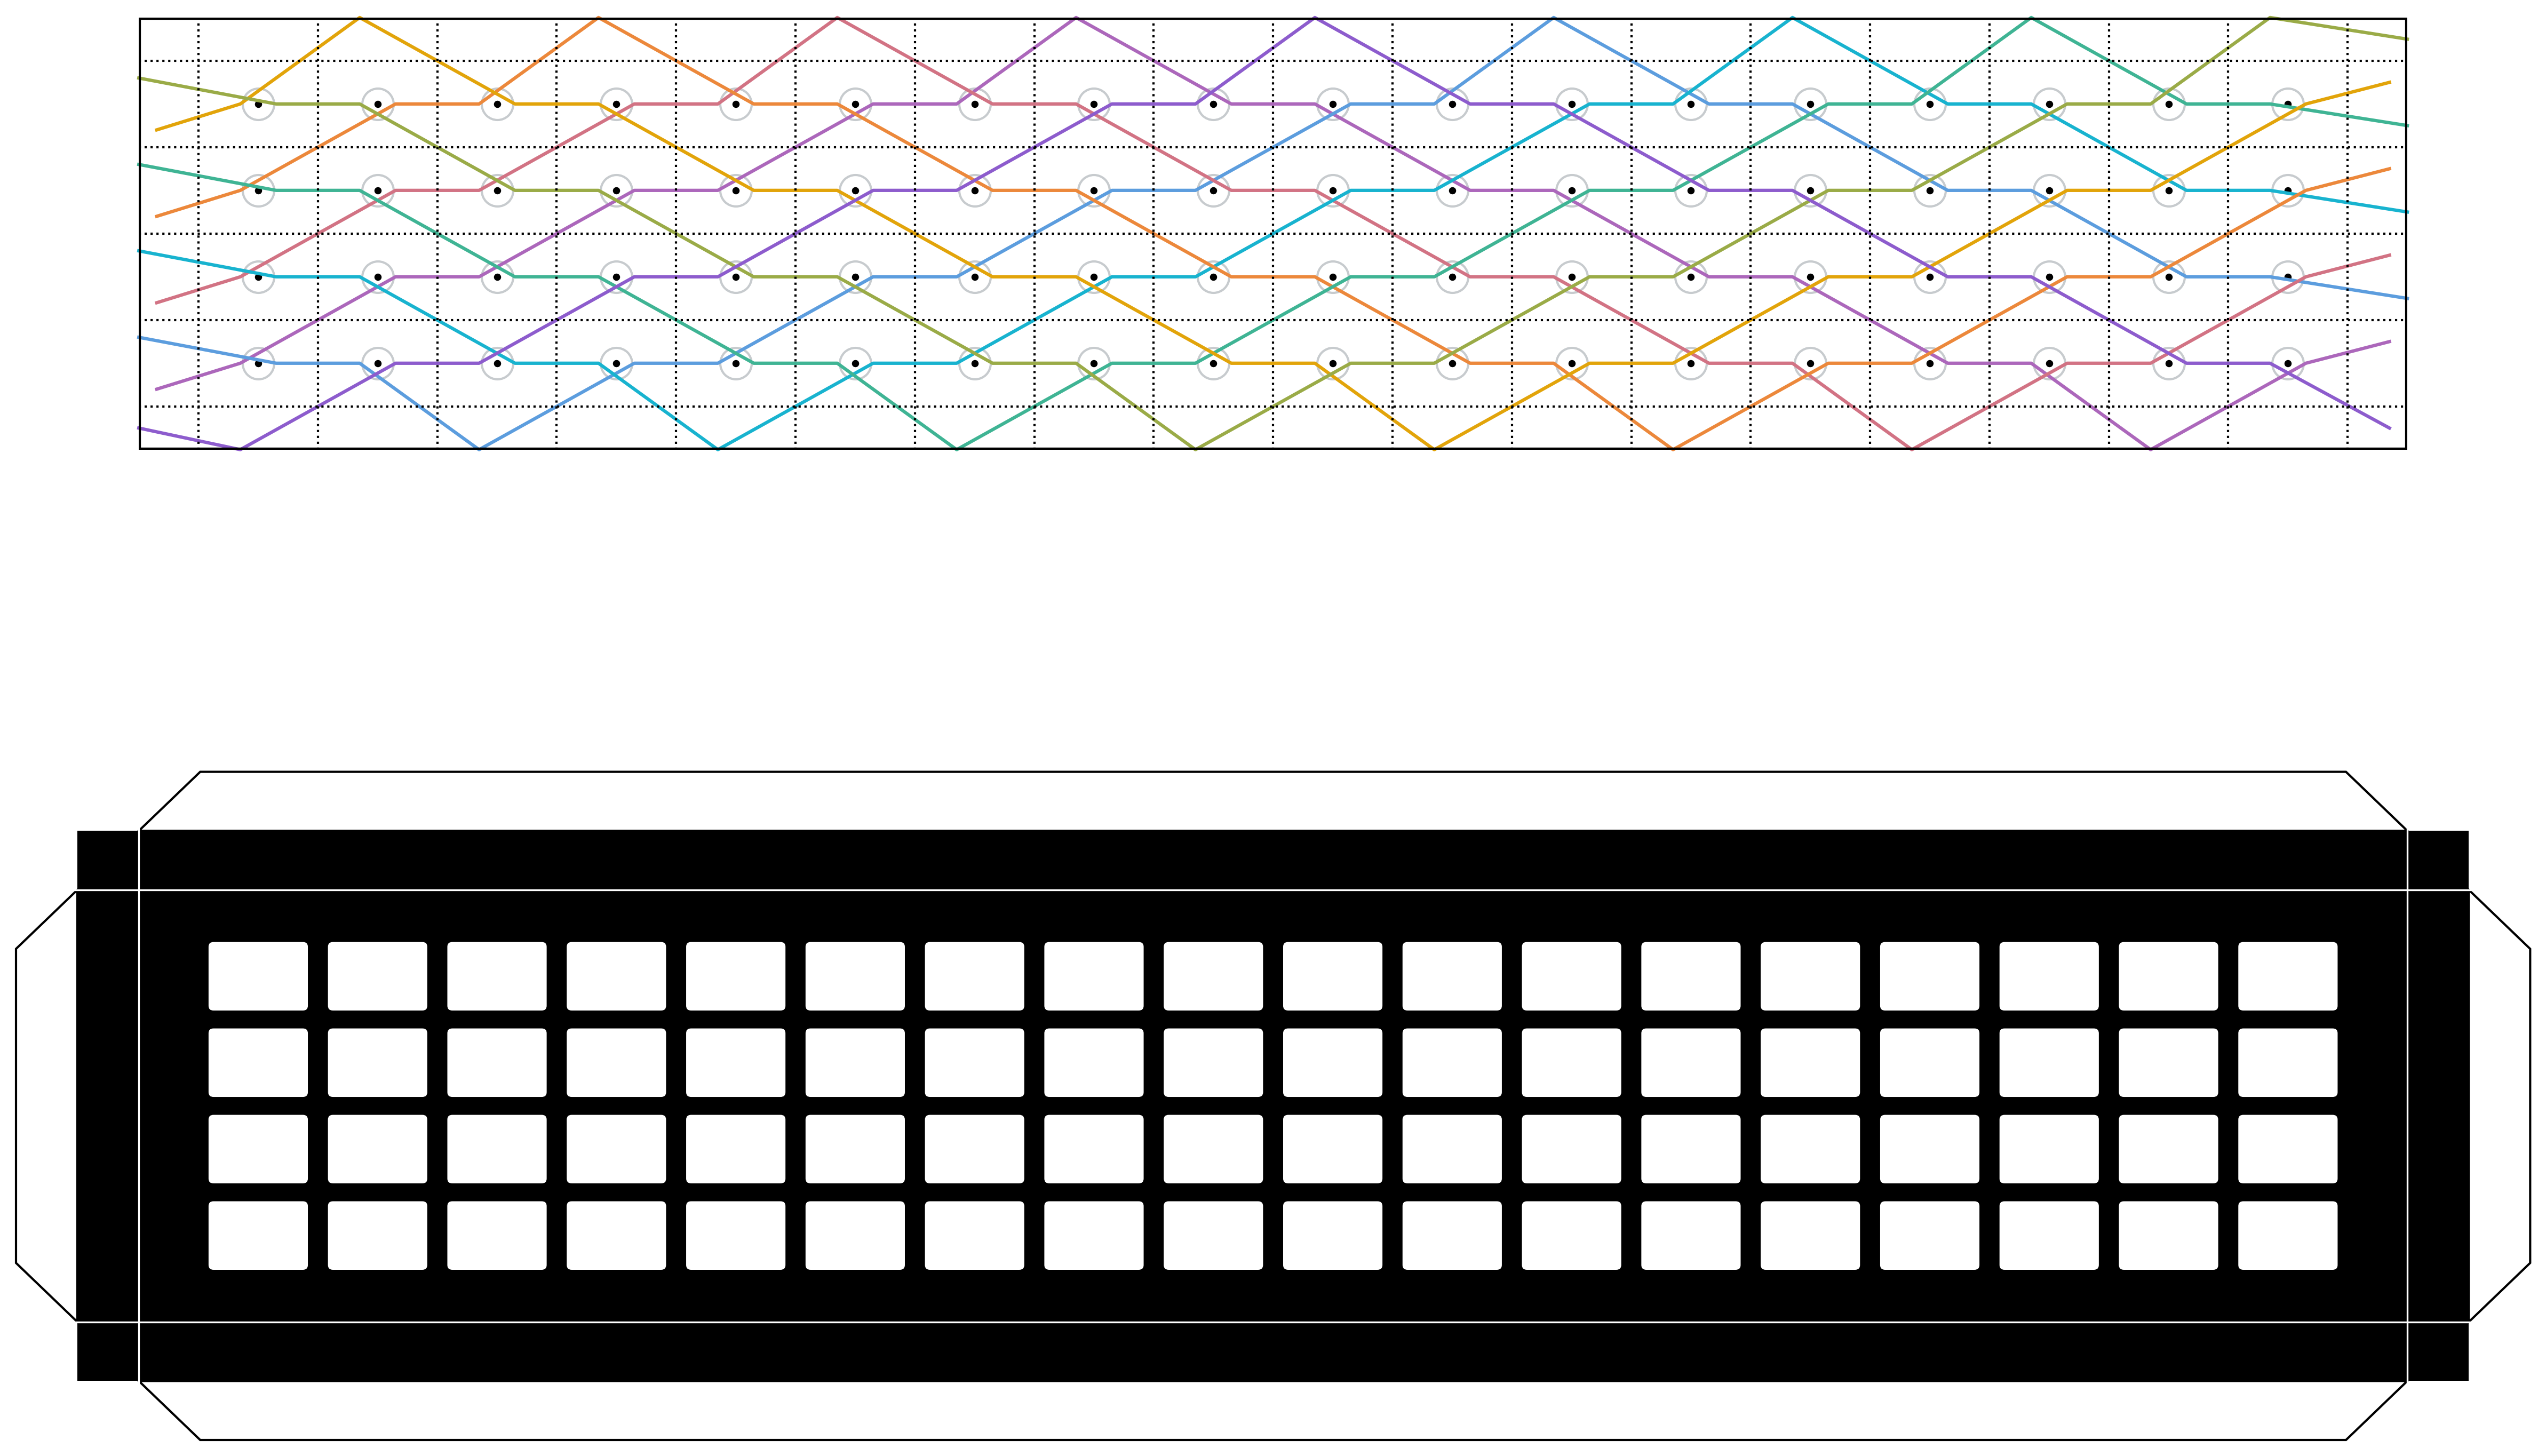

In [17]:
# Paper units
figsizecm = A3sizecm
figsizein = figsizecm/cmperinch
paperlengthcm,paperheightcm = A3sizecm

N  = 9 # should be odd
H  = N//2
M  = N*(N-1)
W  = M//H

marqueelengthcm = A3sizecm[0]-6
marqueeaspect   = 5.25
marqueeheightcm = marqueelengthcm/marqueeaspect
cellpaddingmm   = 2
marqueepadpx    = 1

dx = (marqueelengthcm-marqueepadpx)/W
dy = (marqueeheightcm-marqueepadpx)/H

# 457 × 88 mm was the resulting paper size?

print("Using %d control lines"%N)
print('Marquee dimension is %0.2f x %0.2f cm'%(marqueeheightcm,marqueelengthcm))
print("Marquee height           is %4d pixels"%H)
print("Marquee width            is %4d pixels"%W)
print('Pixel horizontal spacing is %.2f cm'%dx)
print('Pixel vertical   spacing is %.2f cm'%dy)
print('Pixel aspect ratio       is %.2f'%(dx/dy))
print('Pixel width              is %.2f cm'%(dx-0.1*cellpaddingmm))
print('Pixel height             is %.2f cm'%(dy-0.1*cellpaddingmm))


size = 200
lw = 1.5

EDGECOLOR = 1-(1-BLACK)*0.9
VCOLOR    = BLACK
HCOLOR    = BLACK
LEDCOLOR  = 1-(1-BLACK)*0.2
EDGECOLOR = 1-(1-BLACK)*0.3

mx,my=0,0
figure(figsize=figsizein,dpi=300)

# Manually "fix" axis size
ax1 = subplot(211)
padleftrightcm = (paperlengthcm-marqueelengthcm)/2
padtopcm       = paperheightcm - marqueeheightcm - 3
pattopfraction = padtopcm / paperheightcm
padLRfraction  = padleftrightcm / paperlengthcm
widthfraction  = marqueelengthcm/paperlengthcm
heightfraction = marqueeheightcm/paperheightcm
ax1.set_position((padLRfraction,pattopfraction,widthfraction,heightfraction))
print(ax1.get_position())

# Draw dots at LED locations
for i in range(W):
    for j in range(H):
        scatter(i*dx,j*dy,s=size,facecolor=(1,1,1,0),edgecolor=EDGECOLOR,clip_on=False)
        scatter(i*dx,j*dy,s=5,color='k',clip_on=False)

# Draw traces/routing
def paint_path(y0,d0=1,i=0,color=BLACK):
    px,py = [],[]
    x = -1
    y = y0
    direction = d0
    py = [y+(direction)*-.3] if y>=0 else [-0.75]
    while x<=W:
        px += [x+(0.15*(-1 if i%2 else 1))]
        py += [y-d0*0.25+0.5] if x>=W-1 else [y]
        i += 1
        if y==H:
            direction = -1
            y += direction
            i += 1
        elif y==-1:
            direction = 1
            y += direction
            i += 1
        elif (i%2):
            y += direction
        x += 1
    px,py = array(px),array(py)
    px = maximum(-1,px)
    px = minimum(W,px)
    plot(px*dx,py[:-1]*dy,color=color,zorder=1,clip_on=False)

for i in range(H):
    paint_path(i,1,0,color=riley((i+1)/N))
    paint_path(i,-1,1,color=riley((N-0.5)/N-(i+0.75)/N))
if (N%2):
    paint_path(-1,1,1,color=riley(0))
for i in range(W+1):
    axvline((i-0.5)*dx,color='k',lw=1,linestyle=':')
for i in range(H+1):
    axhline((i-0.5)*dy,color='k',lw=1,linestyle=':')
px02 = (-.5-marqueepadpx/2)*dx
py02 = (-.5-marqueepadpx/2)*dy
axvline(px02,color='k',lw=2)
axhline(py02,color='k',lw=2)
axvline(W*dx,color='k',lw=2)
axhline(H*dy,color='k',lw=2)
xlim(px02,W*dx)
ylim(py02,H*dy)
noxyaxes()


# Manually "fix" axis size
ax2 = subplot(212,facecolor='k')
padleftrightcm = (paperlengthcm-marqueelengthcm)/2
padtopcm       = 6
pattopfraction = padtopcm / paperheightcm
padLRfraction  = padleftrightcm / paperlengthcm
widthfraction  = marqueelengthcm/paperlengthcm
heightfraction = marqueeheightcm/paperheightcm
ax2.set_position((padLRfraction,pattopfraction,widthfraction,heightfraction))
print(ax2.get_position())


for i in range(W+1):
    axvline((i-0.5)*dx,color='k',lw=6)
for i in range(H+1):
    axhline((i-0.5)*dy,color='k',lw=6)
px02 = (-.5-marqueepadpx/2)*dx
py02 = (-.5-marqueepadpx/2)*dy
axvline(px02,color='k',lw=2)
axhline(py02,color='k',lw=2)
axvline(W*dx,color='k',lw=2)
axhline(H*dy,color='k',lw=2)
for i in range(W):
    for j in range(H):
        px = (i-0.5)*dx+0.1*cellpaddingmm/2
        py = (j-0.5)*dy+0.1*cellpaddingmm/2*(dx/dy)
        pdx = dx-0.1*cellpaddingmm
        pdy = dy-0.1*cellpaddingmm*(dx/dy)
        pad = 0.1
        rescale = 1/(1+pad*2)
        fixx = pdx*(1-rescale)/2
        fixy = pdy*(1-rescale)/2
        p_bbox = FancyBboxPatch((px+fixx,py+fixy),pdx*rescale,pdy*rescale,
                                boxstyle="round,pad=%f"%pad,
                                ec="k", fc='w',
                                zorder = 10)
        gca().add_patch(p_bbox)

# Tabs
def draw_tab_y(y1,dy=1):
    px = [px02,W*dx,W*dx,px02]
    py = [y1,y1,y1+dy,y1+dy]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='k', 
                                  clip_on=False))
    px = [px02,W*dx,W*dx-1,px02+1]
    py = [y1+dy,y1+dy,y1+2*dy,y1+2*dy]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='w',
                                  edgecolor='k',
                                  clip_on=False))
draw_tab_y(H*dy)
draw_tab_y(py02,-1)

def draw_tab_x(x1,dx=1):
    py = [py02-1,H*dy+1,H*dy+1,py02-1]
    px = [x1,x1,x1+dx,x1+dx]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='k', 
                                  clip_on=False))
    py = [py02,H*dy,H*dy-1,py02+1]
    px = [x1+dx,x1+dx,x1+2*dx,x1+2*dx]
    ax2.add_patch(patches.Polygon(xy=list(zip(px,py)),
                                  fill=True, 
                                  facecolor='w',
                                  edgecolor='k',
                                  clip_on=False))
draw_tab_x(W*dx)
draw_tab_x(px02,-1)
for y1 in [H*dy,py02]:
    plot([px02-2,W*dx+2],[y1,y1],color='w',clip_on=False,lw=0.8)
for x1 in [W*dx,px02]:
    plot([x1,x1],[py02-2,H*dy+2],color='w',clip_on=False,lw=0.8)

xlim(px02,W*dx)
ylim(py02,H*dy)
noxyaxes()

savefig('Marquee_%s_cartoon.svg'%N,facecolor='w',edgecolor='k',papertype='a3')